In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("training_set_HW3_LWYang.csv")
df.drop("Unnamed: 10", axis=1, inplace=True)
jk = {"M" : 1, "F" : 0}
df["SEX"] = df["SEX"].map(jk)
df_features = df.drop("SOURCE", axis=1)
X = df_features
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,1,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,0,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,1,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,1,0


In [2]:
X_mean = X.mean(0)
X_std = X.std(0)
X_norm = (X - X_mean) / X_std
X_norm

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,-0.741151,-0.791311,-0.465006,-0.824542,-0.966425,-0.604497,-0.430194,-0.536624,-0.623765,-1.054841
1,1.067306,0.600026,2.951140,-0.483949,-0.238675,-2.903757,-1.552839,-2.835614,-0.486617,0.947723
2,0.782641,0.600026,0.032119,-0.503984,0.684324,0.878896,-0.590572,1.343054,1.067733,-1.054841
3,0.615192,0.791935,0.159587,-1.044925,0.151824,0.953066,0.852828,0.735773,-1.309507,-1.054841
4,0.397507,0.264186,0.389030,1.239050,4.012447,-0.307819,-0.430194,-0.131770,-0.486617,0.947723
...,...,...,...,...,...,...,...,...,...,...
3304,0.129588,0.216209,-0.120842,-0.944751,-1.853924,0.545133,0.371695,0.432133,-0.075171,0.947723
3305,-2.147728,-2.182649,-1.624966,-0.664263,-1.498924,-1.160770,-0.831139,-0.999314,-2.086682,-1.054841
3306,-0.004372,-0.167608,-0.184576,-0.063217,0.613324,-0.011140,-0.670761,0.316461,0.793436,0.947723
3307,0.866366,1.175752,0.949890,0.277376,0.595574,0.174284,1.333961,-0.377574,-0.623765,0.947723


## PCA

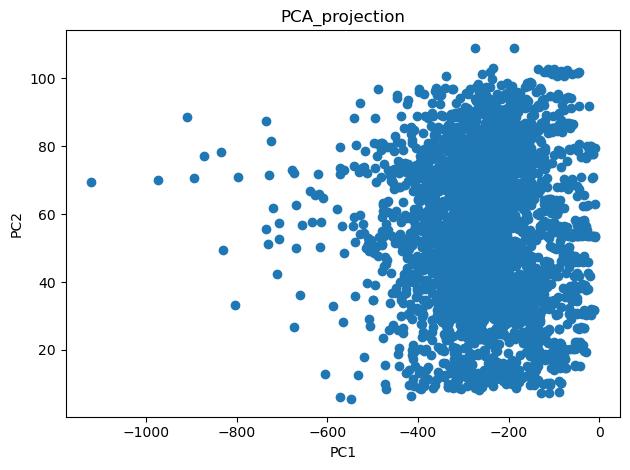

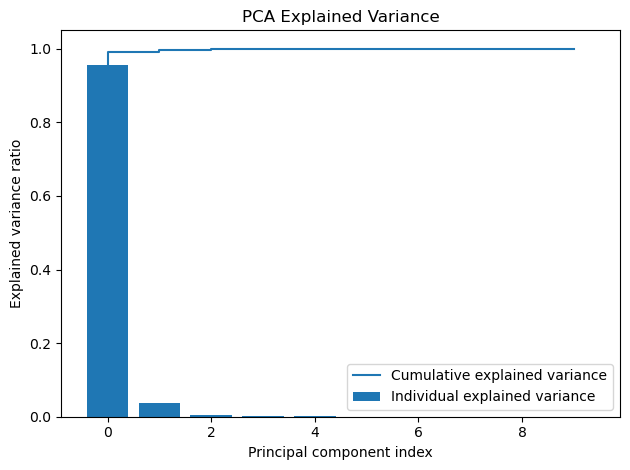

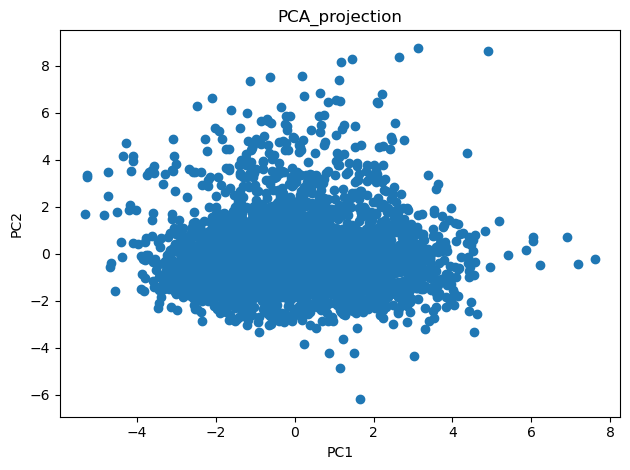

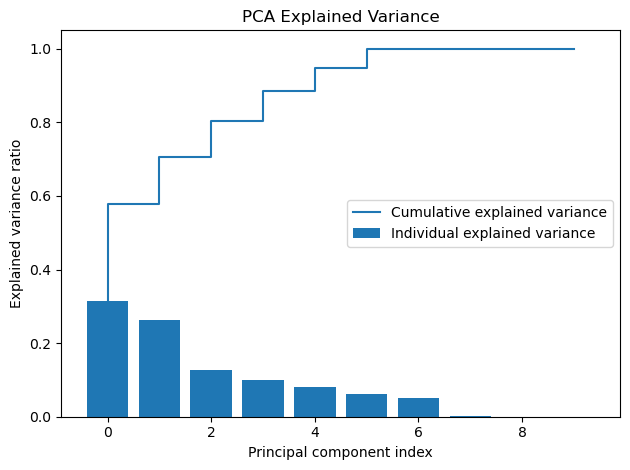

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class PCA:
    """
    The goal of PCA is to find the direction that maximize the variance while avoiding lack of information. 
    Basically, PCA does not rely on the label of the sample, so it is classified as unsupervised learning method.

    self.n_samples: int
        Number of samples.

    self.n_features: int
        Number of features.

    self.n_components: int
        Number of components.

    self.components: ndarray of shape (n_features, n_components)
        Pricipal component, PC_i = self.components[:, i]

    self.X_proj: ndarray of shape (n_samples, n_components) 
        Data projection onto components.

    self.cum_sum_eigval: 1D array (1, n_features)
        Cumulative sum of eigenvalue.

    self.ratio_eigval: 1D array (1, n_features)
        PCA explained variance of each component.

    References for normalization
    1. https://www.quora.com/Is-standardization-and-normalization-the-same-in-PCA-When-should-or-should-not-we-normalize-data-in-PCA
    2. https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca
    3. https://stats.stackexchange.com/questions/385775/normalizing-vs-scaling-before-pca
    """
    def __init__(self, n_components=2):
        self.n_components = n_components

    def fit(self, X, y=None):
        """Fit the model with X.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            n_samples (int): number of samples
            n_features (int): number of features.

        y : Ignored

        Returns
        -------
        self : object
            Returns the instance itself.
        """
        self.n_samples, self.n_features = X.shape

        if self.n_components >= self.n_features:
            raise ValueError(f'n_components must be lower than n_features, {self.n_components} {self.n_features}')

        if self.n_components >= min(self.n_samples, self.n_features):
            self.n_components = min(self.n_samples, self.n_features)

        # Mean, Q and C (variance-covariance matrix)
        X_mean = X.mean(0)
        Q = (X - X_mean) / np.sqrt(self.n_samples - 1)
        C = Q.T @ Q

        # Eigendecomposition (EVD) and sorted the eigenvalue/eigenvector in decreasing order
        eigval, eigvec = np.linalg.eig(C)       # Eq. 5
        idx_sorted = np.argsort(eigval)[::-1]   # Eq. 6
        eigval = eigval[idx_sorted]
        eigvec = eigvec[:, idx_sorted]

        components = eigvec[:, :self.n_components] # Take out components
        X_proj = X @ components                 # Eq. 7-8
        total_eigval = eigval.sum()             # Eq. 9
        ratio_eigval = eigval / total_eigval    # Eq. 9
        cum_sum_eigval = np.cumsum(ratio_eigval) # Return the cumulative sum of eigenvalue

        self.cum_sum_eigval = cum_sum_eigval
        self.ratio_eigval = ratio_eigval
        self.components = components
        self.X_proj = X_proj
        return self

    def visualization(self, PCA_projection=True, explained_variace=True):
        """Visualize the data along component and PCA explained variance (Eq. 9)
        This function only visualized 2 PCs (if n_components = 2) and 3 PCs (if n_components > 2)
        """
        if PCA_projection:
            fig = plt.figure()
            if self.n_components == 2:
                plt.scatter(self.X_proj[:, 0], self.X_proj[:, 1])
                plt.xlabel('PC1')
                plt.ylabel('PC2')
                plt.title('PCA_projection')
            
            if self.n_components > 2:
                fig = fig.add_subplot(projection='3d')
                fig.scatter(self.X_proj[:, 0], self.X_proj[:, 1], self.X_proj[:, 2])
                fig.set(xlabel='PC1', ylabel='PC2', zlabel='PC3', title='PCA_projection')
            plt.tight_layout()
            plt.show()

        if explained_variace:
            fig = plt.figure()
            plt.bar(np.arange(self.n_features), self.ratio_eigval, label='Individual explained variance')
            plt.step(np.arange(self.n_features), self.cum_sum_eigval, label='Cumulative explained variance')
            plt.title('PCA Explained Variance')
            plt.ylabel('Explained variance ratio')
            plt.xlabel('Principal component index')
            plt.legend()
            plt.tight_layout()
            plt.show()

pca = PCA(n_components=2)
pca.fit(np.array(X))
pca.visualization(explained_variace=True, PCA_projection=True)
X_proj = pca.X_proj
PC1_X = pca.components[:, 0]

pca = PCA(n_components=2)
pca.fit(np.array(X_norm))
pca.visualization(explained_variace=True, PCA_projection=True)
X_norm_proj = pca.X_proj
PC1_X_norm = pca.components[:, 0]

### Feature importance

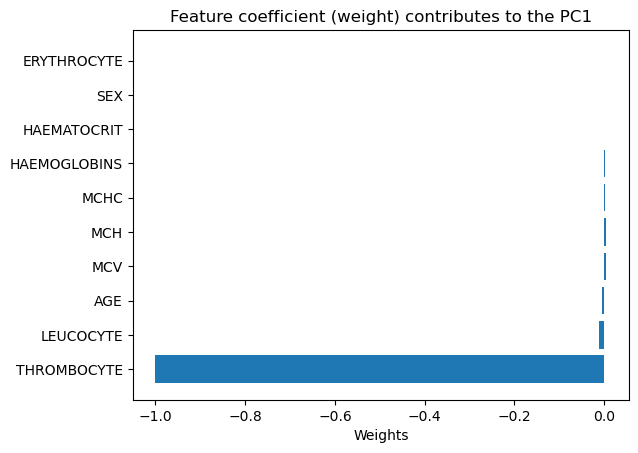

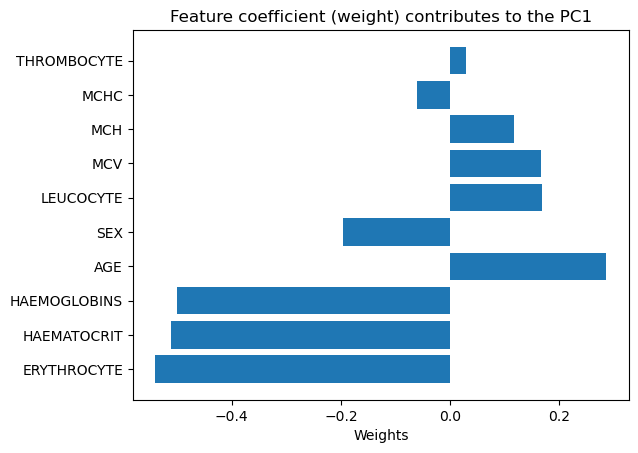

In [4]:
feature_names = df_features.columns

# Sort the feature coefficients by absolute values in descending order
sorted_weights = np.abs(PC1_X).argsort()[::-1]

pos = np.arange(len(feature_names))
plt.barh(pos, PC1_X[sorted_weights], align='center')
plt.yticks(pos, feature_names[sorted_weights])
plt.xlabel('Weights')
plt.title('Feature coefficient (weight) contributes to the PC1')
plt.show()

# Sort the feature coefficients by absolute values in descending order
sorted_weights = np.abs(PC1_X_norm).argsort()[::-1]

pos = np.arange(len(feature_names))
plt.barh(pos, PC1_X_norm[sorted_weights], align='center')
plt.yticks(pos, feature_names[sorted_weights])
plt.xlabel('Weights')
plt.title('Feature coefficient (weight) contributes to the PC1')
plt.show()

### Comparison

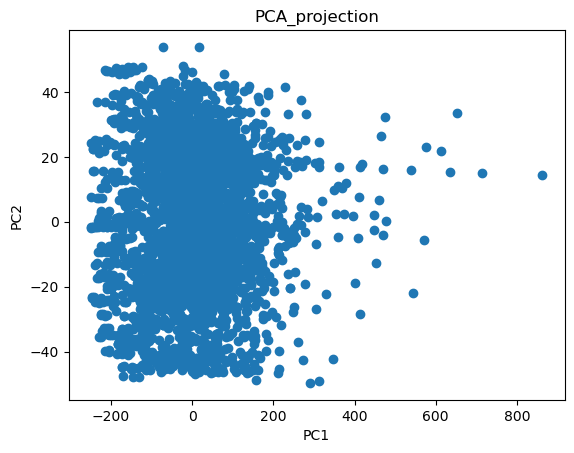

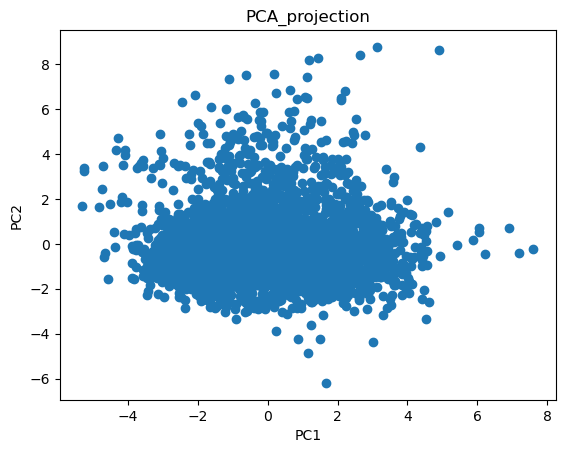

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)
# print(X_proj)
fig = plt.figure()
plt.scatter(X_proj[:, 0], X_proj[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA_projection')
plt.show()

X_norm_proj = pca.fit_transform(X_norm)
# print(X_norm_proj)
fig = plt.figure()
plt.scatter(X_norm_proj[:, 0], X_norm_proj[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA_projection')
plt.show()